In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('../Datasets/vgsales.csv', parse_dates=['Year'])
df["Year"].fillna(df["Year"].median(),inplace = True)
df["Year"] = df['Year'].dt.year

temp_df = df.loc[df['Platform'].isin(['X360','Wii', 'DS'])]
na_df = df.groupby('Year')[['NA_Sales']].sum()
na_df

,NA_Sales
Year,
1980,10.59
1981,33.40
1982,26.92
1983,7.76
1984,33.28
1985,33.73
1986,12.50
1987,8.46
1988,23.87


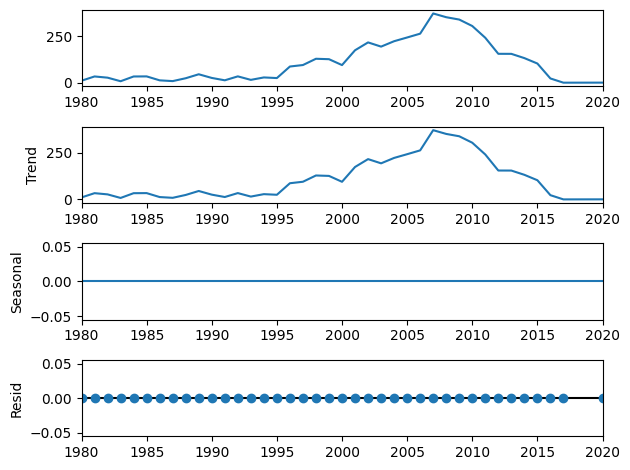

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = na_df
result = seasonal_decompose(series, model='additive', period=1)


result.plot()
pyplot.show()

<AxesSubplot: xlabel='Year'>

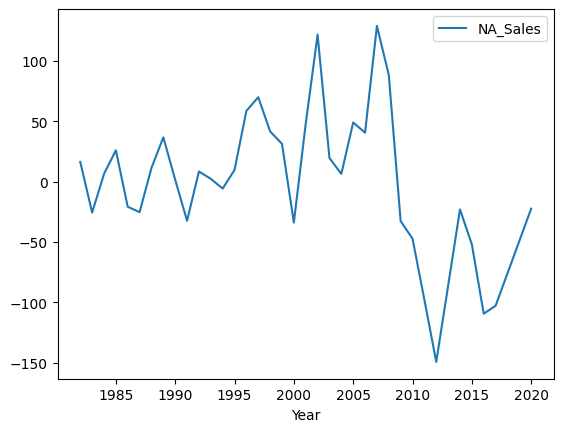

In [66]:
from statsmodels.tsa.stattools import adfuller

adfuller(na_df)

diffed = na_df.diff(2).dropna()

adfuller(diffed)

diffed.plot()

Test RMSE: 65.054


c:\Users\devrh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 0, 'Year')

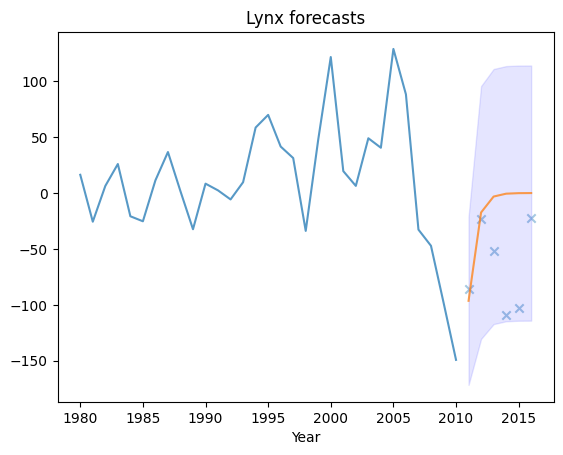

In [65]:
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import numpy as np

train, test = model_selection.train_test_split(diffed, train_size=d)


modl = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=False,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

# print(modl.summary())
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

x_axis = np.arange(train.shape[0] + preds.shape[0])
x_years = x_axis + 1980  # Year starts at 1821

plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)  # Forecasts
plt.scatter(x_years[x_axis[train.shape[0]:]], test,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Lynx forecasts")
plt.xlabel("Year")


